# CSE474/574 - Programming Assignment 2

## Part 2 - Image Classification

Additional library requirement: `Pillow`. See [here](https://anaconda.org/anaconda/pillow) for installation instructions.

For this part, we will use `keras` with a `tensorflow` backend, instead of directly using `tensorflow`, as in Part 1. See [here](https://anaconda.org/conda-forge/keras) for installation instructions.

In [1]:
from __future__ import print_function
from keras.models import Sequential
from keras.layers import Dense, Activation

import numpy as np
import random as rd
import time
import pickle
import os
from PIL import Image
#os.environ["CUDA_VISIBLE_DEVICES"]="1"
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.
/usr/local/lib/python3.5/dist-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.5/dist-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.5/dist-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.5/dist-packages/tensorflow/python/framework/dtypes.py:519: FutureWarn

In [8]:
def resize_images(data,size):
    '''
    Resize images in a given data matrix (1 per row) to the specified size in the tuple - size.
    '''
    resized_data = np.empty((data.shape[0],size[0]*size[1]))
    for i in range(data.shape[0]):
        d = (np.array(Image.fromarray(data[i,:].reshape((28,28))).resize(size))).flatten()
        resized_data[i,:] = d
    return resized_data    

In [9]:
classes = ['apple', 'airplane', 'basketball', 'axe', 'banana', 'horse', 'arm', 'alarm clock', 'ant', 'bed']

In [29]:
# Preparing the data set
with open('AI_quick_draw.pickle', 'rb') as open_ai_quick:
    data_train = pickle.load(open_ai_quick)
    #data_train changed to a resized 5x5 version
    data_train = resize_images(data_train, (5, 5))
    label_train1 = pickle.load(open_ai_quick)
    data_test = pickle.load(open_ai_quick)
    #data_test changed to a resized 5x5 version
    data_test = resize_images(data_test, (5, 5))
    label_test1 = pickle.load(open_ai_quick)
n_classes = len(np.unique(label_train1))
# convert labels to 0-1 hot encoding
label_train = np.zeros((label_train1.shape[0], n_classes))
a = np.arange(label_train1.shape[0], dtype=np.int64)
b = np.array(label_train1, dtype=np.int64).reshape((label_train1.shape[0],))
label_train[a, b] = 1

label_test = np.zeros((label_test1.shape[0], n_classes))
c = np.arange(label_test1.shape[0], dtype=np.int64)
d = np.array(label_test1, dtype=np.int64).reshape((label_test1.shape[0],))
label_test[c, d] = 1

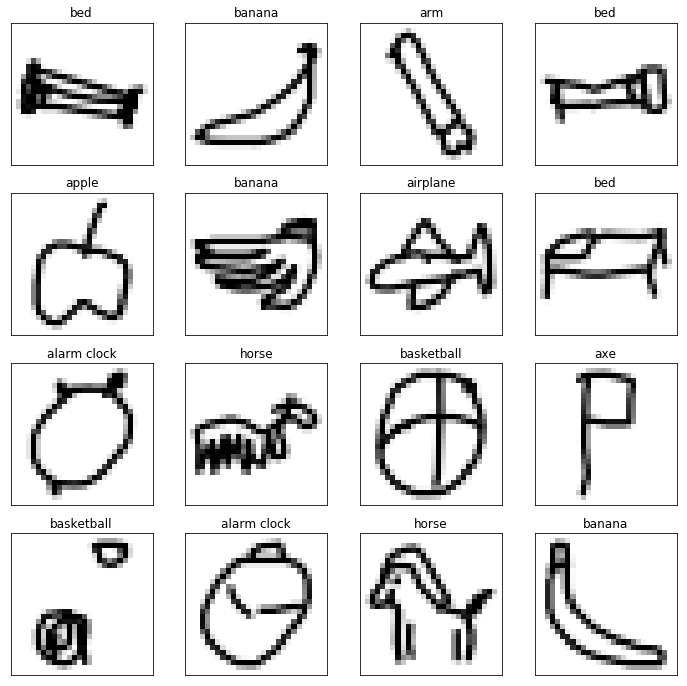

In [30]:
# visualize some images
fig = plt.figure(figsize=[12,12])
for i in range(16):
    ax = plt.subplot(4,4,i+1)    
    ind = np.random.randint(0,data_train.shape[0])
    #reshaping the plt images to fit with the 5x5 data
    plt.imshow(data_train[ind,:].reshape((5,5)),cmap='Greys')
    plt.xticks([])
    plt.yticks([])
    t = plt.title(classes[int(label_train1[ind])])

In [31]:
# for some macosx installations, conflicting copies of mpilib causes trouble with tensorflow.
# use the following two lines to resolve that issue
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

**WARNING**: This cell will take a significantly long time to run

In [32]:
model = Sequential()
model.add(Dense(256, activation='relu', input_dim=data_train.shape[1]))
# you can add more Dense layers here
#using one layer here with the resized data
#adding additional layers with: model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(data_train, label_train, epochs=500, batch_size=32)

Epoch 1/500
100000/100000 [==============================] - 8s 82us/step - loss: 3.1447 - accuracy: 0.6152
Epoch 2/500
100000/100000 [==============================] - 13s 130us/step - loss: 1.4095 - accuracy: 0.6932
Epoch 3/500
100000/100000 [==============================] - 15s 150us/step - loss: 1.3983 - accuracy: 0.7051
Epoch 4/500
100000/100000 [==============================] - 13s 132us/step - loss: 1.3933 - accuracy: 0.7115
Epoch 5/500
100000/100000 [==============================] - 14s 139us/step - loss: 1.3982 - accuracy: 0.7173
Epoch 6/500
100000/100000 [==============================] - 15s 145us/step - loss: 1.3870 - accuracy: 0.7228
Epoch 7/500
100000/100000 [==============================] - 18s 180us/step - loss: 1.3725 - accuracy: 0.7256
Epoch 8/500
100000/100000 [==============================] - 14s 140us/step - loss: 1.3768 - accuracy: 0.7319
Epoch 9/500
100000/100000 [==============================] - 12s 124us/step - loss: 1.3578 - accuracy: 0.7352
Epoch 10/500

100000/100000 [==============================] - 8s 78us/step - loss: 0.8799 - accuracy: 0.7982
Epoch 150/500
100000/100000 [==============================] - 8s 81us/step - loss: 0.8691 - accuracy: 0.7979
Epoch 151/500
100000/100000 [==============================] - 8s 80us/step - loss: 0.8693 - accuracy: 0.7978
Epoch 152/500
100000/100000 [==============================] - 8s 81us/step - loss: 0.8736 - accuracy: 0.7970
Epoch 153/500
100000/100000 [==============================] - 8s 80us/step - loss: 0.8853 - accuracy: 0.7974
Epoch 154/500
100000/100000 [==============================] - 8s 80us/step - loss: 0.8762 - accuracy: 0.7978
Epoch 155/500
100000/100000 [==============================] - 8s 80us/step - loss: 0.8727 - accuracy: 0.7979
Epoch 156/500
100000/100000 [==============================] - 8s 80us/step - loss: 0.8790 - accuracy: 0.7971
Epoch 157/500
100000/100000 [==============================] - 8s 80us/step - loss: 0.8691 - accuracy: 0.7965
Epoch 158/500
100000/100

100000/100000 [==============================] - 8s 77us/step - loss: 0.7938 - accuracy: 0.8025
Epoch 298/500
100000/100000 [==============================] - 8s 78us/step - loss: 0.7788 - accuracy: 0.8016
Epoch 299/500
100000/100000 [==============================] - 8s 77us/step - loss: 0.7727 - accuracy: 0.8035
Epoch 300/500
100000/100000 [==============================] - 8s 78us/step - loss: 0.7642 - accuracy: 0.8021
Epoch 301/500
100000/100000 [==============================] - 8s 78us/step - loss: 0.7811 - accuracy: 0.8022
Epoch 302/500
100000/100000 [==============================] - 8s 77us/step - loss: 0.7843 - accuracy: 0.8028
Epoch 303/500
100000/100000 [==============================] - 8s 77us/step - loss: 0.7663 - accuracy: 0.8030
Epoch 304/500
100000/100000 [==============================] - 8s 78us/step - loss: 0.7973 - accuracy: 0.8020
Epoch 305/500
100000/100000 [==============================] - 8s 78us/step - loss: 0.7970 - accuracy: 0.8015
Epoch 306/500
100000/100

100000/100000 [==============================] - 8s 78us/step - loss: 0.7430 - accuracy: 0.8060
Epoch 446/500
100000/100000 [==============================] - 8s 79us/step - loss: 0.7438 - accuracy: 0.8061
Epoch 447/500
100000/100000 [==============================] - 8s 78us/step - loss: 0.7495 - accuracy: 0.8063
Epoch 448/500
100000/100000 [==============================] - 8s 79us/step - loss: 0.7482 - accuracy: 0.8058
Epoch 449/500
100000/100000 [==============================] - 8s 78us/step - loss: 0.7363 - accuracy: 0.8059
Epoch 450/500
100000/100000 [==============================] - 8s 78us/step - loss: 0.7322 - accuracy: 0.8057
Epoch 451/500
100000/100000 [==============================] - 8s 79us/step - loss: 0.7337 - accuracy: 0.8067
Epoch 452/500
100000/100000 [==============================] - 8s 78us/step - loss: 0.7455 - accuracy: 0.8052
Epoch 453/500
100000/100000 [==============================] - 8s 79us/step - loss: 0.7380 - accuracy: 0.8058
Epoch 454/500
100000/100

In [ ]:
# save the model to use with the drawing app (this will be released later)
model.save('pa2-part2-model.h5')

In [33]:
predict_test = model.predict_classes(data_test)
acc_test = np.where(label_test1 == predict_test)[0].shape[0]/data_test.shape[0]
print('Testing accuracy {}'.format(acc_test))

Testing accuracy 0.68732
